In [58]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [59]:
plt.rcParams['figure.dpi'] = 300

In [88]:
G = nx.read_graphml("../data/orbis_network_enriched.graphml")

In [89]:
G.edges(data=True)

EdgeDataView([('50001', '50056', {'km': 54.539, 'expense_inverse': 0.5238344683080146, 'expense': 1.909, 'days': 1.818, 'route_type': 'road'}), ('50001', '50100', {'km': 50.135, 'expense_inverse': 0.5698005698005698, 'expense': 1.755, 'days': 1.671, 'route_type': 'road'}), ('50001', '50293', {'km': 65.681, 'expense_inverse': 0.43497172683775553, 'expense': 2.299, 'days': 2.189, 'route_type': 'road'}), ('50001', '50473', {'km': 225.368, 'expense_inverse': 0.12677484787018256, 'expense': 7.888, 'days': 7.512, 'route_type': 'road'}), ('50056', '50314', {'km': 126.177, 'expense_inverse': 0.22644927536231882, 'expense': 4.416, 'days': 4.206, 'route_type': 'road'}), ('50056', '50370', {'km': 32.01, 'expense_inverse': 0.8928571428571428, 'expense': 1.12, 'days': 1.067, 'route_type': 'road'}), ('50100', '50083', {'km': 58.819, 'expense_inverse': 0.4856726566294317, 'expense': 2.059, 'days': 1.961, 'route_type': 'road'}), ('50293', '50408', {'km': 52.83, 'expense_inverse': 0.5408328826392644, '

In [90]:
bb = nx.betweenness_centrality(G)
nx.set_node_attributes(G, bb, "bb")

In [91]:
bb = nx.betweenness_centrality(G, weight="expense")
nx.set_node_attributes(G, bb, "bb_expense")

In [224]:
katz = nx.katz_centrality_numpy(G, weight="expense_inverse")
nx.set_node_attributes(G, katz, "katz")

In [226]:
eigenvector = nx.eigenvector_centrality_numpy(G, weight="expense_inverse")
nx.set_node_attributes(G, eigenvector, "eigenvector")

In [227]:
nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
nodes.sort_values("bb", ascending=False, inplace=True)
nodes.head(20)

,label,x,y,hanson_label,hanson_ID,pop_est,LIRE_total_N,LIRE_per1_N,LIRE_per2_N,LIRE_per3_N,bb,bb_expense,katz,eigenvector
50516,Messana,38.192,15.557,Messana,1312,11517.0,23,7,10,11,0.446417,0.246878,0.000629,2.167071e-05
50017,Alexandria,31.200,29.910,Alexandria (Aegyptus),110,410502.0,37,8,11,18,0.403270,0.160253,0.006885,1.930757e-03
50613,Rhodos,36.440,28.230,Rhodus,309,130398.0,1,0,1,1,0.291126,0.148158,-0.008962,7.602144e-02
50179,Gades,36.529,-6.293,Gades,337,14841.0,42,23,23,12,0.237076,0.238277,-0.006170,9.660493e-08
50545,Apollonia-Sozousa,32.930,21.750,NaN,NaN,1000.0,0,0,0,0,0.159816,0.029529,-0.001061,1.919869e-05
50283,Olisipo,38.726,-9.145,Olisipo,1089,7376.0,71,47,15,5,0.151507,0.202783,0.030254,2.358384e-09
50529,Sallentinum Pr.,39.800,18.360,NaN,NaN,1000.0,3,2,3,0,0.141973,0.139412,-0.002201,1.560615e-07
50084,Flavium Brigantium,43.370,-8.397,NaN,NaN,1000.0,44,12,26,25,0.138836,0.194047,0.076731,2.689545e-11
50533,Acroceraunia Pr.,40.440,19.320,NaN,NaN,1000.0,7,6,5,2,0.134070,0.120240,-0.000124,5.194668e-09
50505,Lilybaeum,37.798,12.437,Lilybaeum,1309,15828.0,0,0,0,0,0.126924,0.222824,0.000519,8.279731e-07


In [64]:
### # pelagios provinces - to be used as a base map in our plots
url = "https://raw.githubusercontent.com/pelagios/magis-pleiades-regions/main/pleiades-regions-magis-pelagios.geojson"
pleiades_regions = gpd.read_file(url)
pleiades_regions.head(5)

,name,uri,geometry
0,Lusitania,http://pleiades.stoa.org/places/1101,"POLYGON ((-7.31057 37.19663, -7.32457 37.19556..."
1,Byzacena,http://pleiades.stoa.org/places/991345,"MULTIPOLYGON (((11.01815 34.62424, 11.00879 34..."
2,Viennensis,http://pleiades.stoa.org/places/992074,"POLYGON ((4.62344 45.60642, 4.71224 45.60876, ..."
3,Lycia et Pamphylia,http://pleiades.stoa.org/places/981530,"MULTIPOLYGON (((29.62331 36.07470, 29.61295 36..."
4,Savia,http://pleiades.stoa.org/places/991357,"POLYGON ((18.10598 45.77203, 18.10654 45.71079..."


In [65]:
orbis_hanson_gpd = gpd.read_parquet("../data/orbis_hanson_lire.par")
positions = dict(zip([str(x) for x in orbis_hanson_gpd["id"].tolist()], list(np.column_stack((orbis_hanson_gpd["y"], orbis_hanson_gpd["x"])))))

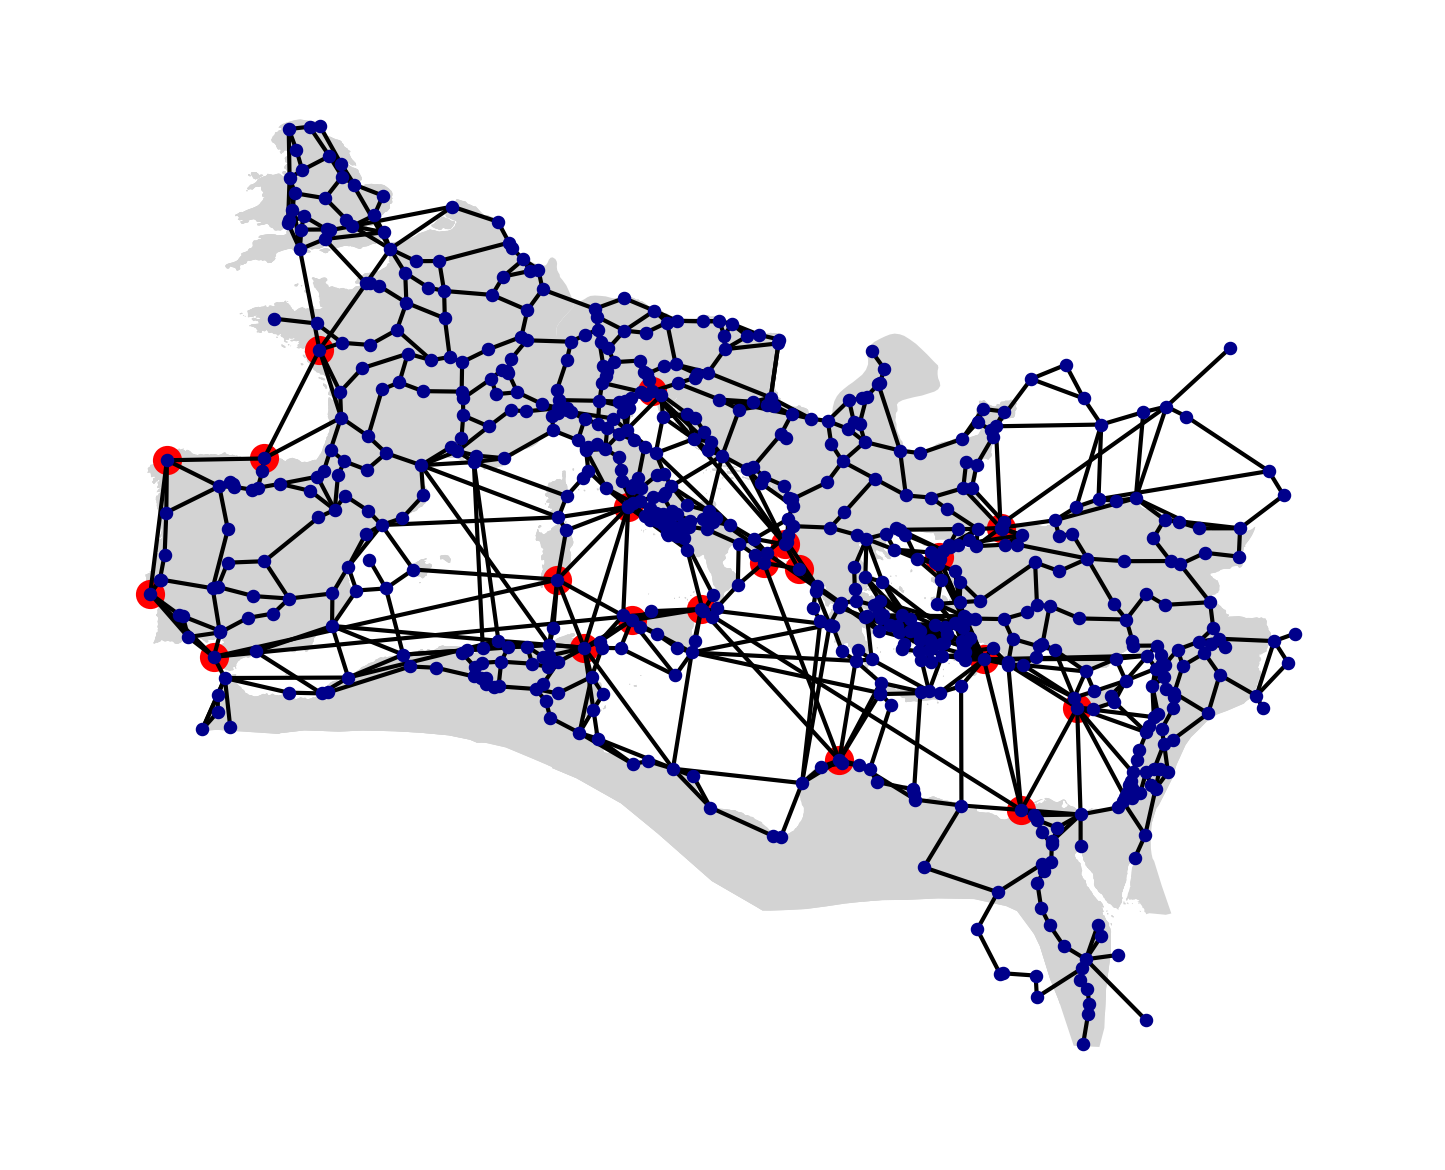

In [228]:
fig, ax = plt.subplots(figsize=[5.2, 4], tight_layout=True)
pleiades_regions.plot(color="lightgray", ax=ax)

red_nodes = nodes.sort_values("bb", ascending=False)
N = 20

plt.scatter(red_nodes["y"][:N], red_nodes["x"][:N], color="red")

nx.draw(G, positions, with_labels=False, node_size=5, node_color="darkblue", node_shape="o", linewidths=1, ax=ax)

ax.set_axis_off()

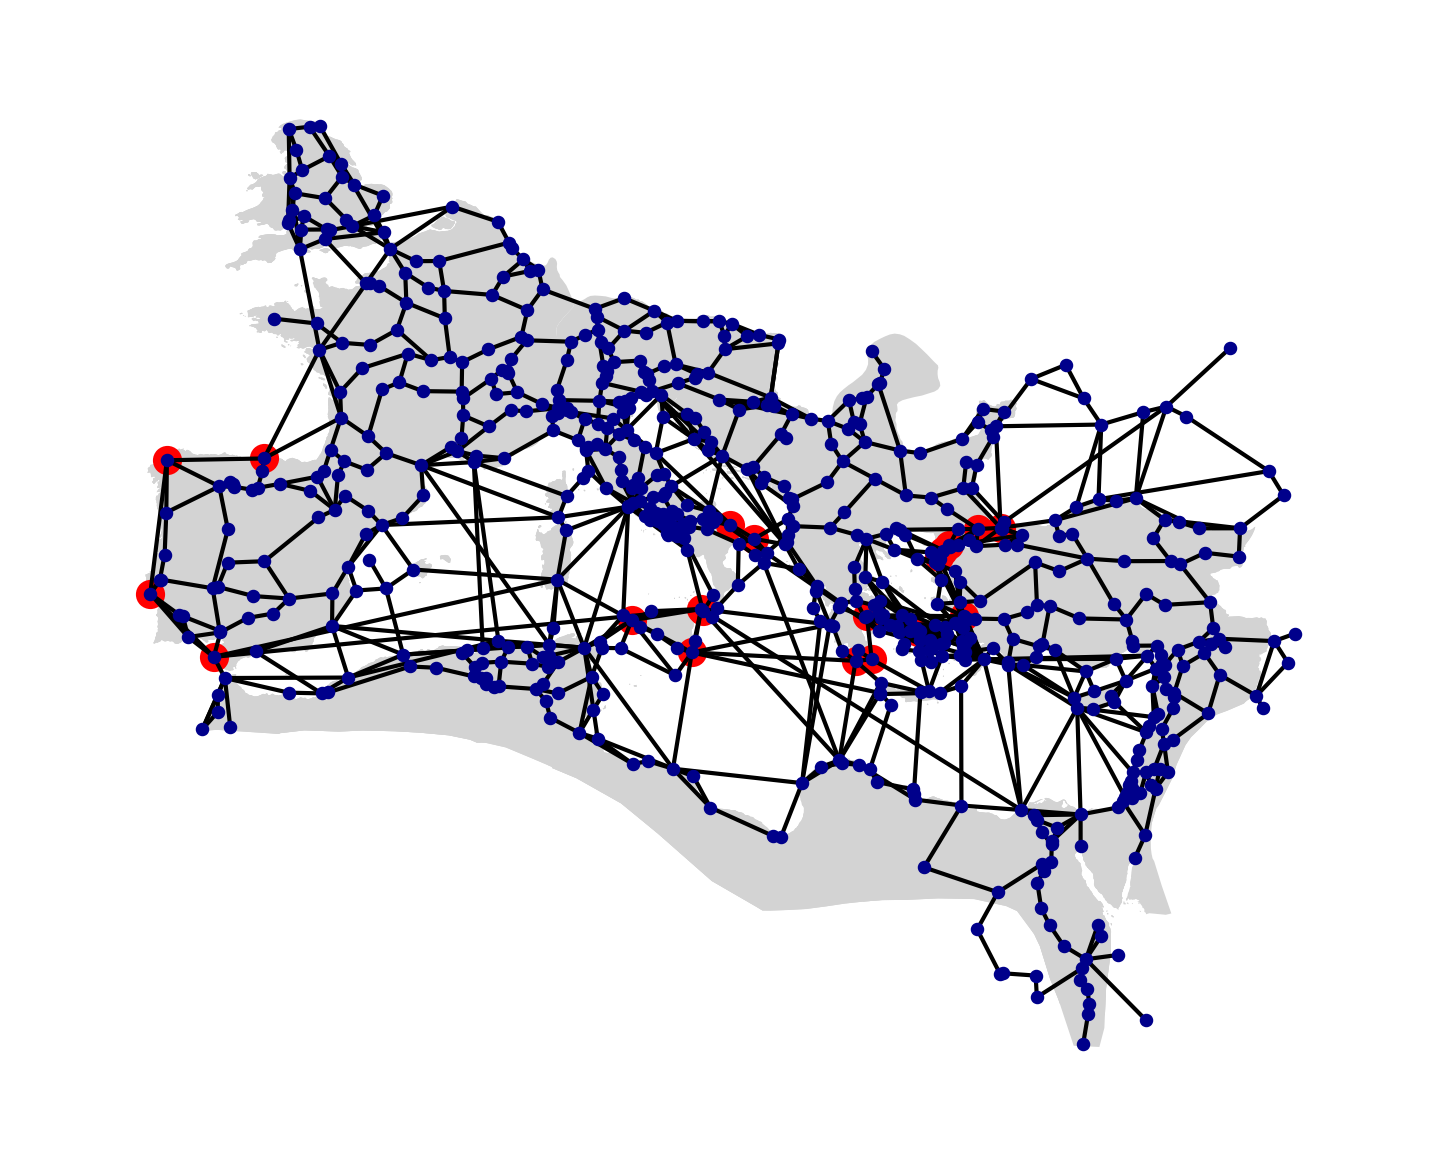

In [229]:
fig, ax = plt.subplots(figsize=[5.2, 4], tight_layout=True)
pleiades_regions.plot(color="lightgray", ax=ax)

red_nodes = nodes.sort_values("bb_expense", ascending=False)
N = 20

plt.scatter(red_nodes["y"][:N], red_nodes["x"][:N], color="red")

nx.draw(G, positions, with_labels=False, node_size=5, node_color="darkblue", node_shape="o", linewidths=1, ax=ax)

ax.set_axis_off()

In [230]:
nodes[["pop_est", "LIRE_total_N", "LIRE_per1_N", "LIRE_per2_N", "LIRE_per3_N", "bb", "bb_expense", "katz", "eigenvector"]].corr()

,pop_est,LIRE_total_N,LIRE_per1_N,LIRE_per2_N,LIRE_per3_N,bb,bb_expense,katz,eigenvector
pop_est,1.000000,0.833316,0.803050,0.775205,0.674682,0.276941,0.085906,0.050015,-0.008939
LIRE_total_N,0.833316,1.000000,0.980055,0.966019,0.880731,0.051614,-0.003493,0.054438,-0.025675
LIRE_per1_N,0.803050,0.980055,1.000000,0.928305,0.835991,0.042980,-0.009044,0.050599,-0.028284
LIRE_per2_N,0.775205,0.966019,0.928305,1.000000,0.949354,0.056345,-0.007962,0.046483,-0.039961
LIRE_per3_N,0.674682,0.880731,0.835991,0.949354,1.000000,0.046397,-0.021154,0.042945,-0.046649
bb,0.276941,0.051614,0.042980,0.056345,0.046397,1.000000,0.560662,0.065988,-0.019950
bb_expense,0.085906,-0.003493,-0.009044,-0.007962,-0.021154,0.560662,1.000000,0.058966,0.049704
katz,0.050015,0.054438,0.050599,0.046483,0.042945,0.065988,0.058966,1.000000,-0.021748
eigenvector,-0.008939,-0.025675,-0.028284,-0.039961,-0.046649,-0.019950,0.049704,-0.021748,1.000000


In [231]:
nodes_gdf = gpd.GeoDataFrame(nodes, geometry=gpd.points_from_xy(nodes["y"], nodes["x"])) #, crs={"init": "epsg:3

In [121]:
url = "https://datahub.io/core/geo-countries/r/countries.geojson"
countries = gpd.read_file(url)

In [163]:
countries["ADMIN"].tolist()

['Aruba',
 'Afghanistan',
 'Angola',
 'Anguilla',
 'Albania',
 'Aland',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antarctica',
 'Ashmore and Cartier Islands',
 'French Southern and Antarctic Lands',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'The Bahamas',
 'Bosnia and Herzegovina',
 'Bajo Nuevo Bank (Petrel Is.)',
 'Saint Barthelemy',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 'Ivory Coast',
 'Clipperton Island',
 'Cameroon',
 'Cyprus No Mans Area',
 'Democratic Republic of the Congo',
 'Republic of Congo',
 'Cook Islands',
 'Colombia',
 'Comoros',
 'Cape Verde',
 'Costa Rica',
 'Coral Sea Islands',
 'Cuba',
 'Curaçao',
 'Cayman Islands',
 'Northern Cyprus',
 'Cyprus',
 'Czech Republic',
 'Germ

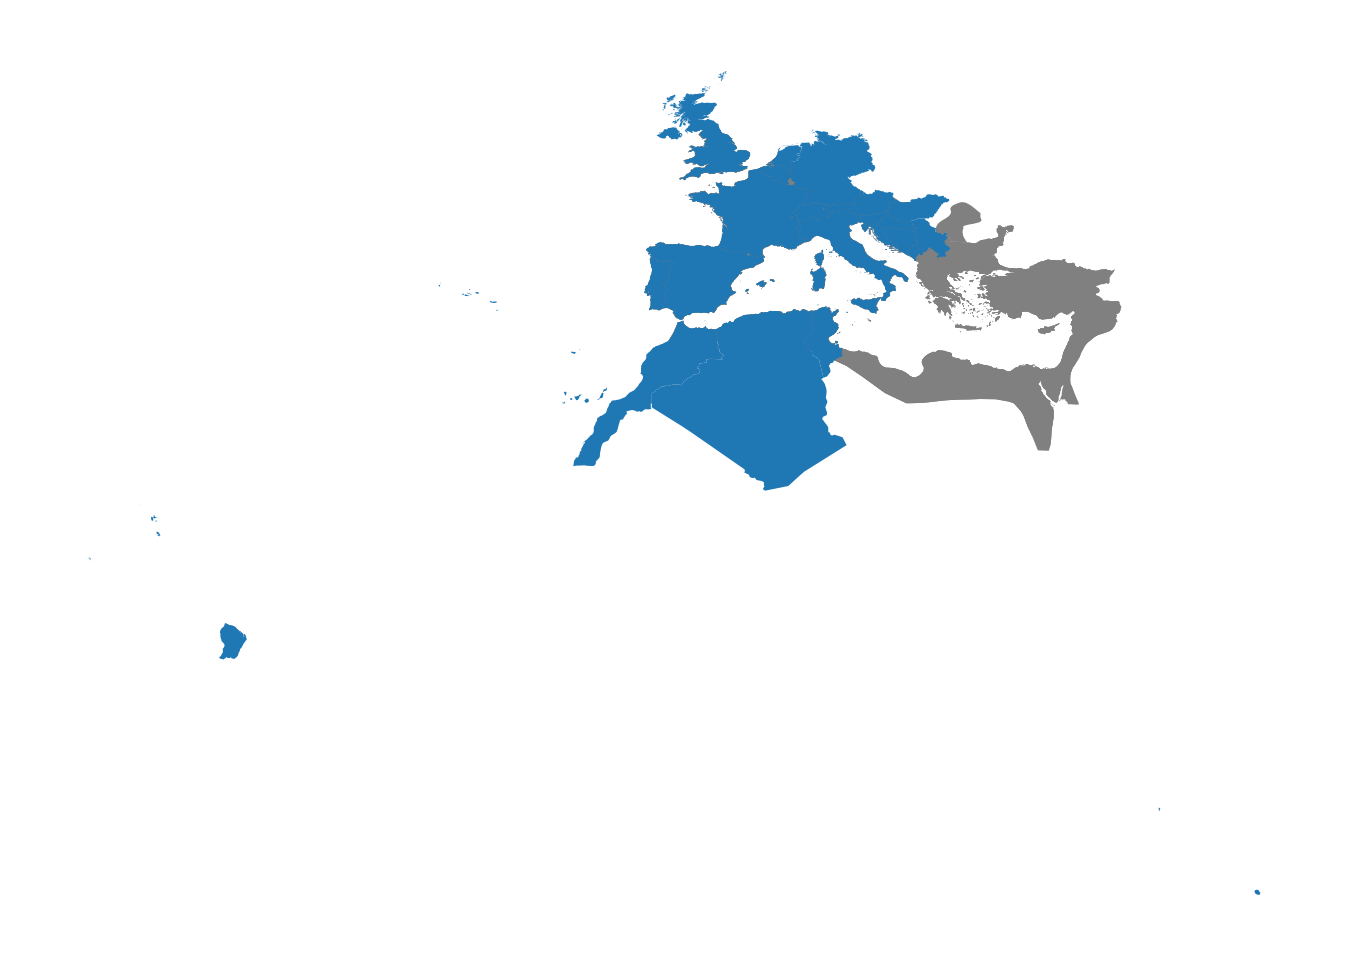

In [233]:
ax = pleiades_regions.plot(color="grey")

countries_latin = ["Tunisia", "Italy", "Switzerland", "France", 'Spain', "Croatia", "Montenegro", "Republic of Serbia", "Bosnia and Herzegovina", 'United Kingdom', 'Croatia', 'Germany', 'Belgium', 'Netherlands', 'Portugal', 'Slovenia', 'Algeria', 'Morocco', 'Austria', 'Hungary']
countries_west = countries[countries["ADMIN"].isin(countries_latin)]
countries_west.plot(ax=ax)
ax.set_axis_off()

In [234]:
countries_west_union = countries_west.unary_union

In [235]:
nodes_west = nodes_gdf[nodes_gdf.within(countries_west_union)]

<AxesSubplot:>

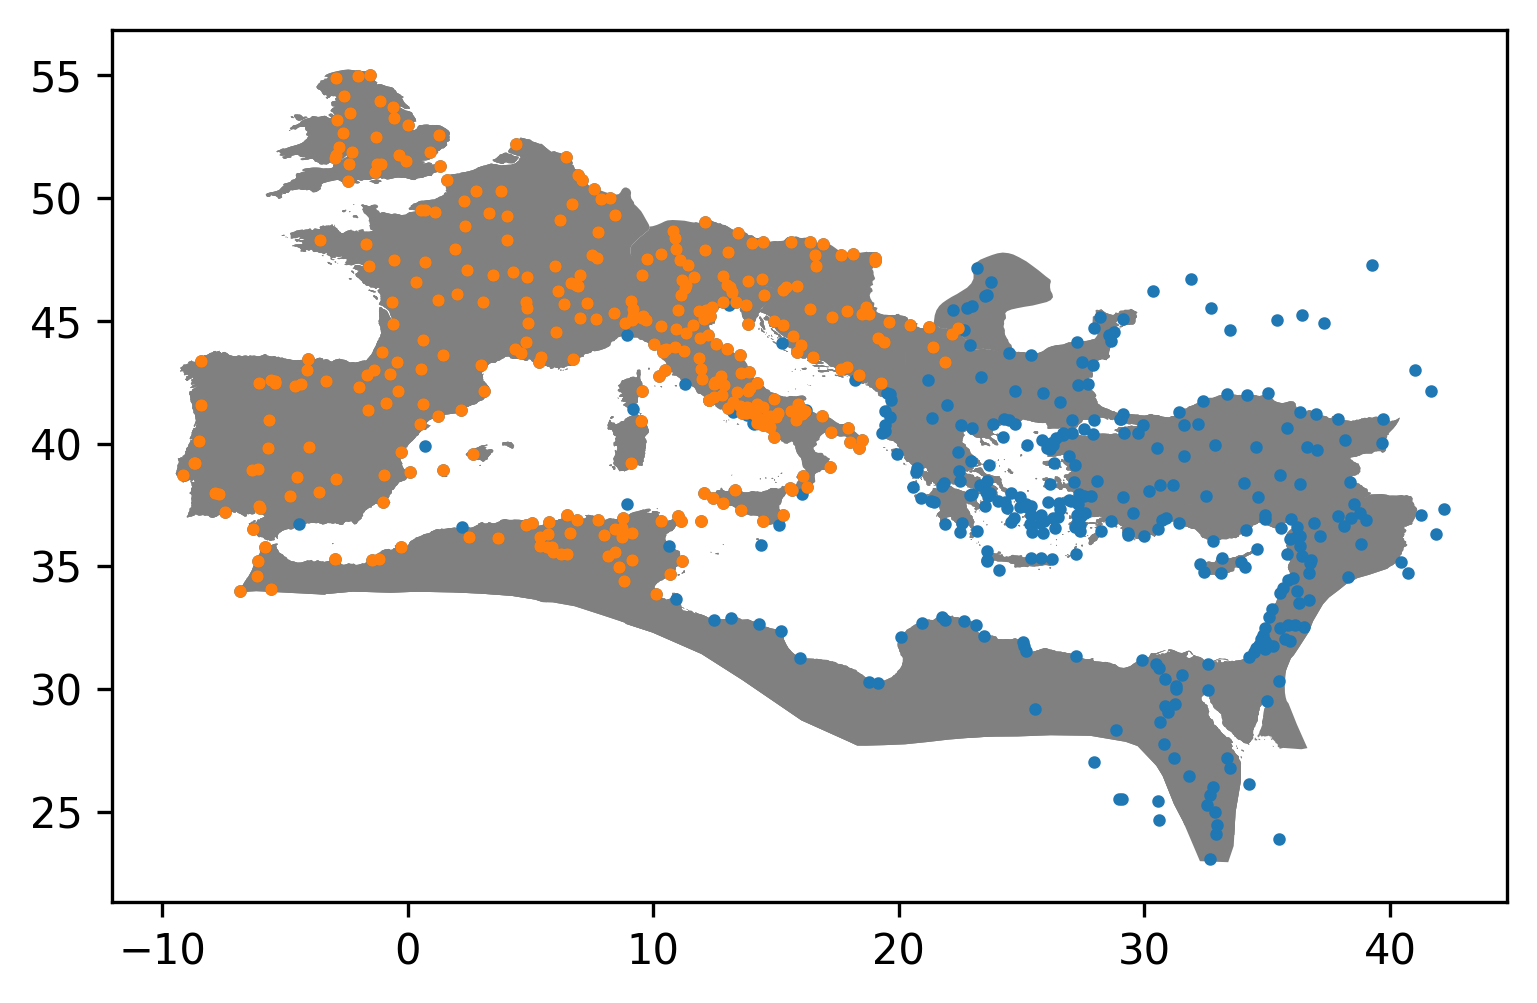

In [236]:
ax = pleiades_regions.plot(color="grey")
nodes_gdf.plot(markersize=4, ax=ax)
nodes_west.plot(markersize=4, ax=ax)

In [239]:
nodes_west[["pop_est", "LIRE_total_N", "LIRE_per1_N", "LIRE_per2_N", "LIRE_per3_N", "bb", "bb_expense", "eigenvector", "katz"]].corr()

,pop_est,LIRE_total_N,LIRE_per1_N,LIRE_per2_N,LIRE_per3_N,bb,bb_expense,eigenvector,katz
pop_est,1.000000,0.961379,0.928071,0.906366,0.808915,0.093282,0.033587,0.011491,0.059649
LIRE_total_N,0.961379,1.000000,0.981473,0.969412,0.895847,0.070967,0.008976,-0.013904,0.046541
LIRE_per1_N,0.928071,0.981473,1.000000,0.932659,0.858850,0.056906,-0.000233,-0.016374,0.040926
LIRE_per2_N,0.906366,0.969412,0.932659,1.000000,0.961562,0.079635,0.009604,-0.021197,0.034487
LIRE_per3_N,0.808915,0.895847,0.858850,0.961562,1.000000,0.071826,-0.001723,-0.023824,0.030385
bb,0.093282,0.070967,0.056906,0.079635,0.071826,1.000000,0.758268,0.601852,0.096080
bb_expense,0.033587,0.008976,-0.000233,0.009604,-0.001723,0.758268,1.000000,0.415823,0.120648
eigenvector,0.011491,-0.013904,-0.016374,-0.021197,-0.023824,0.601852,0.415823,1.000000,-0.012534
katz,0.059649,0.046541,0.040926,0.034487,0.030385,0.096080,0.120648,-0.012534,1.000000


In [240]:
nodes_gdf[["pop_est", "LIRE_total_N", "LIRE_per1_N", "LIRE_per2_N", "LIRE_per3_N", "bb", "bb_expense", "eigenvector", "katz"]].corr()

,pop_est,LIRE_total_N,LIRE_per1_N,LIRE_per2_N,LIRE_per3_N,bb,bb_expense,eigenvector,katz
pop_est,1.000000,0.833316,0.803050,0.775205,0.674682,0.276941,0.085906,-0.008939,0.050015
LIRE_total_N,0.833316,1.000000,0.980055,0.966019,0.880731,0.051614,-0.003493,-0.025675,0.054438
LIRE_per1_N,0.803050,0.980055,1.000000,0.928305,0.835991,0.042980,-0.009044,-0.028284,0.050599
LIRE_per2_N,0.775205,0.966019,0.928305,1.000000,0.949354,0.056345,-0.007962,-0.039961,0.046483
LIRE_per3_N,0.674682,0.880731,0.835991,0.949354,1.000000,0.046397,-0.021154,-0.046649,0.042945
bb,0.276941,0.051614,0.042980,0.056345,0.046397,1.000000,0.560662,-0.019950,0.065988
bb_expense,0.085906,-0.003493,-0.009044,-0.007962,-0.021154,0.560662,1.000000,0.049704,0.058966
eigenvector,-0.008939,-0.025675,-0.028284,-0.039961,-0.046649,-0.019950,0.049704,1.000000,-0.021748
katz,0.050015,0.054438,0.050599,0.046483,0.042945,0.065988,0.058966,-0.021748,1.000000
